<a href="https://colab.research.google.com/github/AmrMKayid/KayAI/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB: Movie reviews - Binary Classification

## Loading the IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

### Decode one of these reviews back to English words

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

### One-hot encode

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

##### vectorized Labels 

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Network

In [0]:
from keras import models
from keras import layers

kaynet = models.Sequential()
kaynet.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
kaynet.add(layers.Dense(16, activation='relu'))
kaynet.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model with Configurations

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

kaynet.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [13]:
history = kaynet.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.5071 - binary_accuracy: 0.7837 - val_loss: 0.3788 - val_binary_accuracy: 0.8702
Epoch 2/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2998 - binary_accuracy: 0.9048 - val_loss: 0.2998 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2169 - binary_accuracy: 0.9287 - val_loss: 0.3094 - val_binary_accuracy: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1743 - binary_accuracy: 0.9438 - val_loss: 0.2840 - val_binary_accuracy: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1418 - binary_accuracy: 0.9542 - val_loss: 0.2855 - val_binary_accuracy: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1143 - binary_accuracy: 0.9655 - val_loss: 0.3139 - val_bi

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

## Plotting

### Plotting the training and validation loss

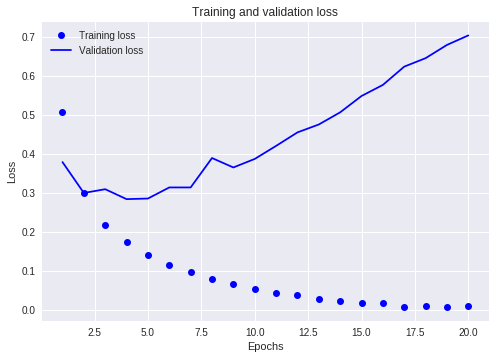

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

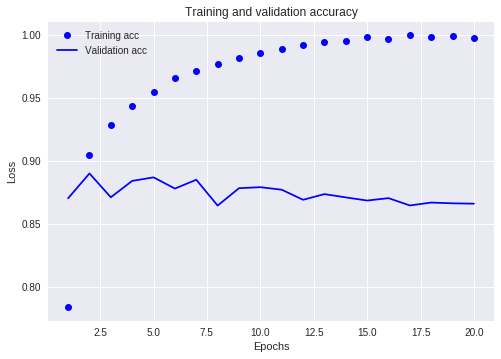

In [16]:
plt.clf()

acc_values = history_dict['binary_accuracy'] 
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Retraining a model from scratch

In [17]:
kaynet = models.Sequential()
kaynet.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
kaynet.add(layers.Dense(16, activation='relu'))
kaynet.add(layers.Dense(1, activation='sigmoid'))

kaynet.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

kaynet.fit(x_train, y_train, epochs=4, batch_size=512)

results = kaynet.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4738 - acc: 0.8206
Epoch 2/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2636 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1991 - acc: 0.9306
Epoch 4/4
25000/25000 [==============================] - 2s 94us/step


In [18]:
results

[0.3275120354938507, 0.87168]

### Prediction

In [19]:
kaynet.predict(x_test)

array([[0.1278222 ],
       [0.9997073 ],
       [0.25774673],
       ...,
       [0.07330128],
       [0.04513724],
       [0.46468258]], dtype=float32)